<a href="https://colab.research.google.com/github/Rezquellah/ML-Intro/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression from scratch

Linear regression is a statistical modeling technique used to predict the value of a continous numerical target variable.The target variable is also known as the dependant variable. 

The equation for simple linear regression can be written as:

**Y = β0 + β1X + ε**

where:

*   Y is the predicted variable (also known as the dependent variable)
*   X is the input variable (also known as the independent variable or predictor)

*   β0 is the y-intercept of the line 
*   β1 is the slope of the line (also known as the regression coefficient)

*   ε is the error term (also known as the residual)

### Linear Regression steps



*   **Dataset**: The above dataset that we generate using the library of Sklearn is a simple dataset that has one feature represented by **X** and a target variable **Y**, we would like to create a regression model that will be able to predict new Y values given nex X values with minimum error. 

*   **Model**: As shown on the graph we noticed that there is a **linear** relationship between X and Y, which means that we should use a linear regression model, and we can represented as a linear function **Y = a.X + b**. Y and X aer known we have them in our dataset, but the parameters **a** and **b** are unknown and our mission is to create a model that can predict the parameters of **a** and **b**. To start the parameters (a and b) will be random, so at first the model will get us a lot of error. 

*   **Cost Function**: We are going to use the **Mean Squared Error (MSE)**, which is a metric that measures the average of the squared differences between the predicted Ŷ and actual values of a Y (target variable).

$MSE = \frac{1}{2m} \sum_{i=1}^{m} (Y_i - \hat{Y_i})^2$

*   **Optimisation Algorithm**: Our mean objectif to create a good model is to find the optimized parameters **a** and **b** that will provide us with the minimum error. A lower MSE indicates better performance, we are going to use the **Gradient Descent** to reduce the cost function MSE.Gradient Descent can find the minimum of any convex function.

Gradient descent for the parameter **a** is:  
$a_{t+1} = a_t - \alpha \frac{\partial J(a_t, b_t)}{\partial a_t}$

Gradient descent for the parameter **b** is:  
$b_{t+1} = b_t - \alpha \frac{\partial J(a_t, b_t)}{\partial b_t}$







### Representation in Matrix

The simple linear function Y = a.X + b can be divided into 3 matrix as shown below: 

$\begin{bmatrix} Y_1 \ Y_2 \ \vdots \ Y_n \end{bmatrix} = \begin{bmatrix} X_1 & 1 \ X_2 & 1 \ \vdots & \vdots \ X_n & 1 \end{bmatrix} \begin{bmatrix} a \ b \end{bmatrix}$

To make the above formula easy we will name the matrix [a b] as $\theta$ so the formula can be represented as: 
**Y = X . $\theta$**

### Representation of MSE as matrix

$J(a,b) = \frac{1}{2m} \sum_{i=1}^{m} (Y_i - \hat{Y_i})^2$

$J(a,b) = \frac{1}{2m} \sum_{i=1}^{m} ( X . \theta$ - $\hat{Y_i})^2$

Because a and b are represented by $\theta$ the cost function can be represented as below: 

$J(θ) = \frac{1}{2m} \sum_{i=1}^{m} ( X . \theta$ - $\hat{Y_i})^2$



### Rpresentation of Gradient Descent as matrix

$DJ(a,b)/a = \frac{1}{m} \sum x(Y_i - \hat{Y_i})$

$DJ(a,b)/b = \frac{1}{m} \sum_{i=1}^{m} ( $Y_i - $\hat{Y_i})$

We will take the common things between the two formulas above and we will get the result below:

$DJ(θ)/θ = \frac{1}{m} X^T(X\theta - Y)$ 

Finaly the gradient descent formula is: 

$\theta_{t+1} = \theta_t - \alpha \frac{\partial J(\theta_t)}{\partial \theta_t}$



In [113]:
# Libraries
import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt

## 1- Random dataset

In [114]:
# We will generate a random linear dataset
x, y = make_regression(n_samples = 100,  n_features= 1, noise= 10)

Text(0.5, 1.0, 'Scatter plot of synthetic data')

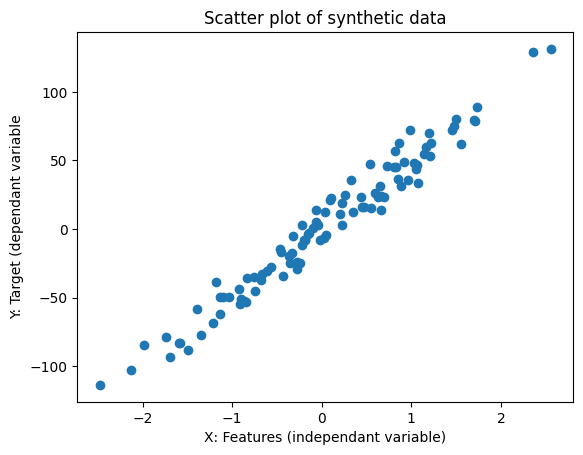

In [115]:
# Data visualisation
plt.scatter(x, y)
plt.xlabel('X: Features (independant variable)')
plt.ylabel('Y: Target (dependant variable')
plt.title('Scatter plot of synthetic data')

In [116]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [117]:
# X and Y don't have the same dimension we should change the dimension of Y
y = y.reshape(y.shape[0], 1)

In [118]:
y.shape

(100, 1)

$\begin{bmatrix} Y_1 \ Y_2 \ \vdots \ Y_n \end{bmatrix} = \begin{bmatrix} X_1 & 1 \ X_2 & 1 \ \vdots & \vdots \ X_n & 1 \end{bmatrix} \begin{bmatrix} a \ b \end{bmatrix}$

In [119]:
# The matrix x must contains also ones (1)  [x  1]
X = np.hstack((x, np.ones(x.shape)))

In [120]:
X.shape

(100, 2)

### Initialisation of theta θ

As discused above theta θ will contain the parameter **a** and **b**, and they will be random number

In [121]:
theta = np.random.randn(2, 1)

In [122]:
theta.shape

(2, 1)

In [123]:
theta

array([[ 2.50530944],
       [-0.91209846]])

### Model creation

Now that we have y, X and theta θ we can write the model
Y = X.θ

In [124]:
def model(X, theta):
  return X.dot(theta)

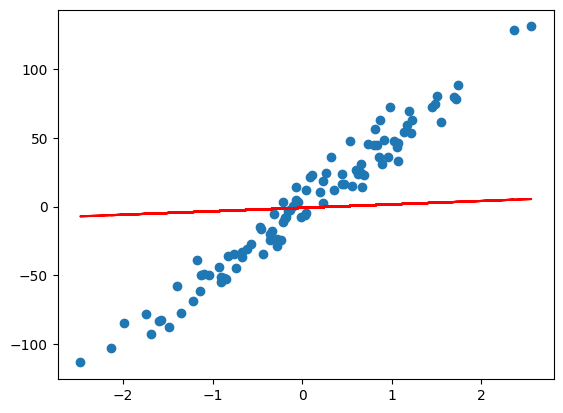

In [125]:
plt.scatter(x, y)
plt.plot(x, model(X,theta), c='r')

As shown on the graph above, the model (represented by the red line) don't fit the data, this is normal because the paramater **a** and **b** were random, we should calculate the error and apply gradient descent to reduce the error and optimize the model. 

### Cost Function

$J(θ) = \frac{1}{2m} \sum_{i=1}^{m} ( X . \theta$ - $\hat{Y_i})^2$


In [126]:
def cost_func(X, y, theta):
  m= len(y)
  return 1/(2*m) * np.sum(model(X, theta) - y)**2

In [127]:
cost_func(X, y, theta)

539.8229857559809

 ### Gradient descecnt

 As shown above the cost function value was **215** which is high we want to reduce the value using the gradient descent. 

 $DJ(θ)/θ = \frac{1}{m} X^T(X\theta - Y)$ 

 $\theta_{t+1} = \theta_t - \alpha \frac{\partial J(\theta_t)}{\partial \theta_t}$



In [128]:
def grad(X, y, theta):
  m = len(y)
  return 1/m * X.T.dot(model(X, theta) - y)

In [129]:
def gradient(X, y, theta, learn_rate, n_iter):
  history = np.zeros(n_iter)
  for i in range(0, n_iter):
    theta = theta - learn_rate * grad(X, y, theta)
    history[i] = cost_func(X, y, theta)
  return theta, history

### Model training 

In [130]:
final_theta, history = gradient(X, y, theta, 0.01, 800)

In [131]:
final_theta

array([[49.45637903],
       [ 0.31118098]])

In [132]:
pred = model(X, final_theta)

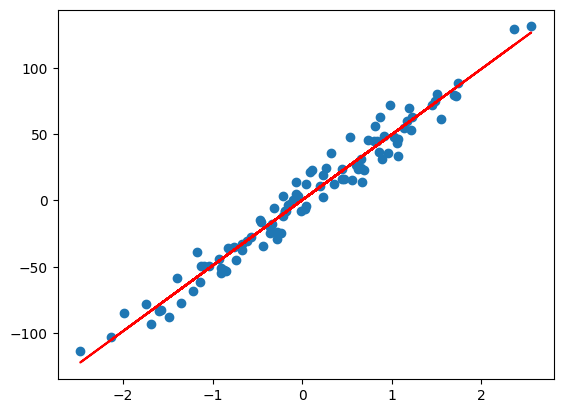

In [133]:
plt.scatter(x, y)
plt.plot(x, pred, c='r')

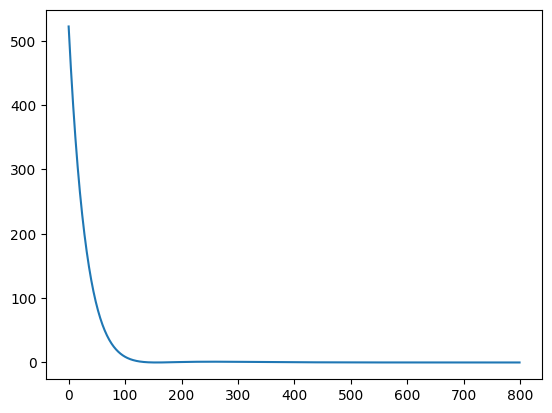

In [136]:
plt.plot(range(800), history)

### Model Performance
To determine the performance of a linear regression model we will use the R2 metric. 
R-squared (R2) Score: This measures the proportion of variance in the target variable that can be explained by the model. Higher values (closer to 1) indicate better performance.

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

SSres : sum of squares of the residuals = sum(y - pred)^2

SStot : total sum of squares = sum(y - moyen(y))^2 



In [137]:
def R2(y, pred):
  ssres = ((y - pred)**2).sum()
  sstot = ((y - y.mean())**2).sum()
  return 1 - ssres/sstot

In [138]:
R2(y, pred)

0.9642725107736869

Our R2 score is 0.96, he indicates that the linear regression model explains 96.43% of the variance in the target variable. This means that the model provides a good fit to the data, as it is able to explain a large portion of the variability in the target variable. In other words, the model is able to capture the underlying patterns and relationships in the data to a high degree of accuracy.